# $\text{PLF}_{\mathbb{R}^2 \rightarrow \mathbb{R}}$

In [1]:
# EDIT THE `POINTS` BELOW IF YOU WANT 

DOMAIN_POINTS = [
    (0, 0, 10),
    (0, 100, 100),
    (100, 100, 20),
    (100, 0, 0),
]

RECT_SPLIT_POINT = (50, 50, 30)

SPLIT_POINTS = [
    (30, 20, 40),
    (30, 60, 70),
]

In [2]:
# import modules and do global configuration

from libplf import plf, piece, point, vector
from matplotlib.pyplot import gca, show
from numpy import arange, meshgrid, array
from itertools import combinations
%matplotlib inline

In [3]:
# define a function for finding piece

def find(ps, x, y):
    for p in ps:
        l = p.barycentric_coordinate(x, y)
        if max(l) <= 1 and min(l) >= 0:
            return p
    return None

In [4]:
# build plf with provided data

ps = {
    piece(
        point(
            vector(RECT_SPLIT_POINT[0], RECT_SPLIT_POINT[1]),
            vector(RECT_SPLIT_POINT[2]),
        ),
        point(
            vector(DOMAIN_POINTS[i][0], DOMAIN_POINTS[i][1]),
            vector(DOMAIN_POINTS[i][2]),
        ),
        point(
            vector(DOMAIN_POINTS[(i+1)%4][0], DOMAIN_POINTS[(i+1)%4][1]),
            vector(DOMAIN_POINTS[(i+1)%4][2]),
        ),
    )
    for i in range(4)
}

for x, y, z in SPLIT_POINTS:
    p = find(ps, x, y)
    if p == None:
        continue
    ps.remove(p)
    for a, b in combinations(p, 2):
        p = piece(
                a,
                b,
                point(
                    vector(x, y),
                    vector(z),
                ),
            )
        ps.add(p)
f = plf(*ps)

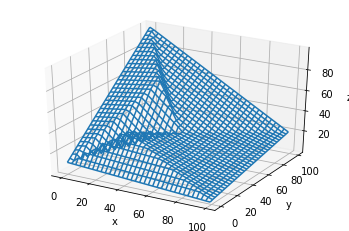

In [5]:
# plot

xs = [x for x, y, z in DOMAIN_POINTS]
xmin, xmax = min(xs), max(xs)
ys = [y for x, y, z in DOMAIN_POINTS]
ymin, ymax = min(ys), max(ys)
xstep = (xmax - xmin) // 0x30 + 1
ystep = (ymax - ymin) // 0x30 + 1

X = arange(xmin, xmax, xstep)
Y = arange(ymin, ymax, ystep)
MX, MY = meshgrid(X, Y)
Z = [[float(f(x, y)[0]) for x in X] for y in Y]
MZ = array(Z)
g = gca(projection='3d')
g.set_xlabel('x')
g.set_ylabel('y')
g.set_zlabel('z')
g.plot_wireframe(MX, MY, MZ)
show()